<a href="https://colab.research.google.com/github/georgeragan/TRANSFER-LEARNING-DOG-VS-CAT-/blob/main/TRANSFER_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Importing the Dog vs Cat Dataset from Kaggle

In [3]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [8]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.6435.jpg', 'cat.1938.jpg', 'dog.8965.jpg', 'cat.1979.jpg', 'cat.4442.jpg', 'dog.3333.jpg', 'cat.11539.jpg', 'cat.7346.jpg', 'cat.9806.jpg', 'cat.1542.jpg', 'dog.706.jpg', 'dog.11469.jpg', 'cat.7279.jpg', 'dog.4874.jpg', 'dog.1295.jpg', 'dog.11527.jpg', 'cat.382.jpg', 'cat.12447.jpg', 'cat.12108.jpg', 'dog.8221.jpg', 'dog.6015.jpg', 'dog.9544.jpg', 'dog.4448.jpg', 'dog.3086.jpg', 'cat.12145.jpg', 'dog.9763.jpg', 'cat.7725.jpg', 'dog.1224.jpg', 'dog.5870.jpg', 'cat.5296.jpg', 'dog.5204.jpg', 'cat.7630.jpg', 'dog.9744.jpg', 'cat.6114.jpg', 'cat.376.jpg', 'cat.9376.jpg', 'cat.872.jpg', 'cat.3666.jpg', 'cat.3588.jpg', 'cat.8040.jpg', 'cat.11391.jpg', 'cat.7813.jpg', 'dog.1983.jpg', 'cat.311.jpg', 'dog.7802.jpg', 'dog.4825.jpg', 'dog.10680.jpg', 'dog.206.jpg', 'dog.9846.jpg', 'cat.7126.jpg', 'cat.11809.jpg', 'cat.10434.jpg', 'dog.672.jpg', 'cat.6522.jpg', 'dog.5717.jpg', 'dog.9948.jpg', 'cat.7647.jpg', 'dog.6262.jpg', 'cat.10670.jpg', 'dog.5766.jpg', 'dog.10128.jpg', 'dog.1587.jpg', 'd

IMPORTING THE DEPENDENCIES

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

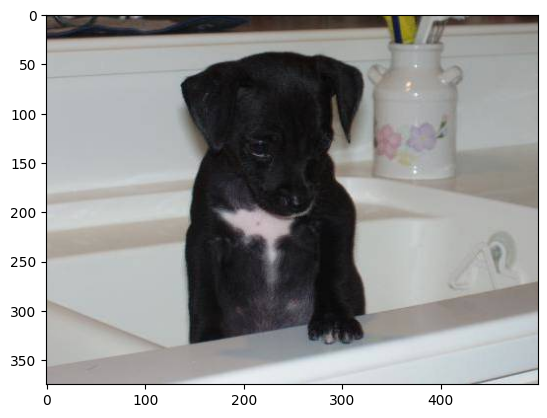

In [10]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

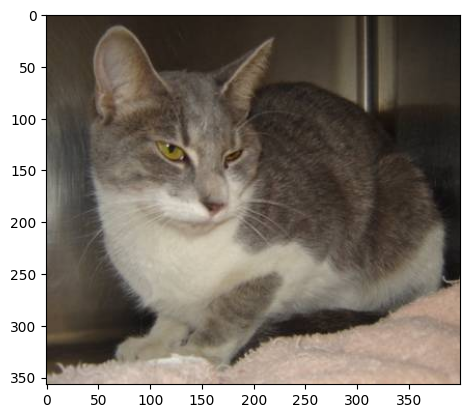

In [11]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [12]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])

cat
cat
dog
cat
cat


In [13]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


RESIZING THE IMAGE AND STORING INTO DIFF DIRECTORY

In [14]:
#creating a directory for resized images
os.mkdir('/content/image resize')

In [25]:
original_folder = '/content/train/'
resized_folder = '/content/image resize/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [27]:
#creating a directory for resized images
os.mkdir('/content/image resizeds')

In [28]:
original_folder = '/content/train/'
resized_folder = '/content/image resizeds/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

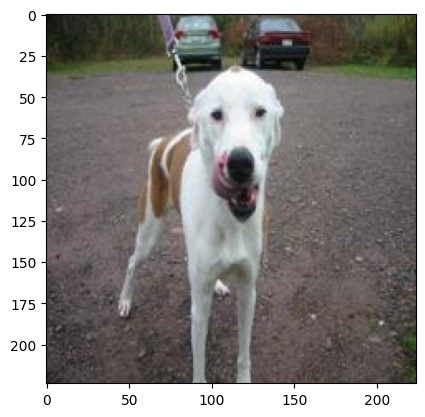

In [30]:
# display resized dog image
img = mpimg.imread('/content/image resizeds/dog.8965.jpg')
imgplt = plt.imshow(img)
plt.show()

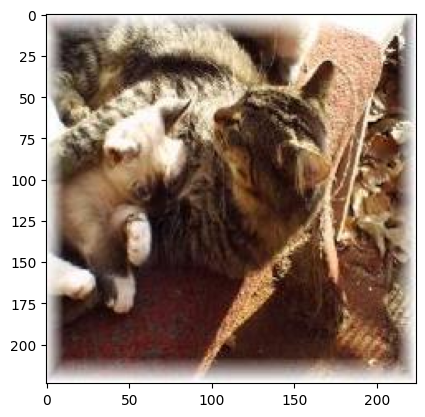

In [33]:
# display resized cat image
img = mpimg.imread('/content/image resizeds/cat.1938.jpg')
imgplt = plt.imshow(img)
plt.show()

In [34]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [35]:
print(filenames[0:5])
print(len(filenames))

['cat.6435.jpg', 'cat.1938.jpg', 'dog.8965.jpg', 'cat.1979.jpg', 'cat.4442.jpg']
2000


In [36]:
print(labels[0:5])
print(len(labels))

[0, 0, 1, 0, 0]
2000


In [38]:
# counting the images of dogs and cats out of 2000 images
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1040  960]


In [41]:
import cv2
import glob


In [42]:
image_directory = '/content/image resizeds/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [43]:
print(dog_cat_images)

[[[[ 40  77 133]
   [ 27  63 117]
   [ 16  50 103]
   ...
   [  5  12  15]
   [  3   8   6]
   [  1   5   0]]

  [[ 35  72 128]
   [ 25  61 115]
   [ 16  50 103]
   ...
   [  6  13  16]
   [  3   8   6]
   [  0   4   0]]

  [[ 29  64 120]
   [ 22  58 112]
   [ 18  52 105]
   ...
   [  6  13  16]
   [  3   8   6]
   [  0   4   0]]

  ...

  [[ 97  68  24]
   [ 97  68  23]
   [ 98  69  24]
   ...
   [104  78  24]
   [101  76  20]
   [ 97  72  16]]

  [[ 94  66  25]
   [ 94  67  23]
   [ 93  66  22]
   ...
   [107  81  27]
   [103  78  22]
   [ 98  74  16]]

  [[ 89  61  20]
   [ 89  61  20]
   [ 89  62  18]
   ...
   [108  83  27]
   [103  78  22]
   [ 99  75  17]]]


 [[[253 255 254]
   [250 253 251]
   [249 251 252]
   ...
   [249 252 250]
   [255 254 253]
   [255 255 254]]

  [[246 248 248]
   [241 243 243]
   [239 241 242]
   ...
   [236 239 237]
   [243 241 240]
   [252 250 249]]

  [[240 242 243]
   [233 235 236]
   [227 229 230]
   ...
   [220 222 222]
   [232 230 230]
   [249 247

In [44]:
type(dog_cat_images)

numpy.ndarray

In [46]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [50]:
X = dog_cat_images
Y = np.asarray(labels)

In [51]:
Y

array([0, 0, 1, ..., 1, 0, 1])

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [53]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [54]:
import tensorflow as tf
import tensorflow_hub as hub

TRANSFER LEARNING

In [55]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [56]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [57]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [58]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 87s 2s/step - loss: 0.2385 - acc: 0.9013
Epoch 2/5
50/50 [==============================] - 75s 1s/step - loss: 0.0877 - acc: 0.9719
Epoch 3/5
50/50 [==============================] - 74s 1s/step - loss: 0.0656 - acc: 0.9806
Epoch 4/5
50/50 [==============================] - 84s 2s/step - loss: 0.0557 - acc: 0.9831
Epoch 5/5
50/50 [==============================] - 73s 1s/step - loss: 0.0464 - acc: 0.9887


In [59]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 18s 1s/step - loss: 0.0376 - acc: 0.9850
Test Loss = 0.03762099891901016
Test Accuracy = 0.9850000143051147


Path of the image to be predicted: /content/download (3).jpeg


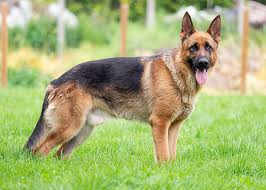

1/1 [==============================] - 1s 999ms/step
[[-2.2725863  2.0738046]]
1
The image represents a Dog


In [60]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')